# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Users/macuser/Desktop/DS5030/uncertainty_assignment1/data')

In [29]:
college_df = pd.read_csv('college_completion.csv')

In [30]:
print(college_df['state'].isna().sum())
print(college_df['control'].isna().sum())

0
0


In [31]:
pd.crosstab(college_df['state'],college_df['control'])

control,Private for-profit,Private not-for-profit,Public
state,,,
Alabama,14,17,38
Alaska,1,1,5
Arizona,35,4,24
Arkansas,3,13,32
California,127,78,145
Colorado,33,10,27
Connecticut,3,15,17
Delaware,1,5,5
District of Columbia,3,8,1


I don't notice any interesting patterns I just thought it would be neat to see the public/private breakdown by state.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [35]:
df = pd.read_csv('nhanes_data_17_18.csv')

/var/folders/0m/jqzg_wts2tb8swdh001spf7h0000gn/T/ipykernel_32026/1051891485.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nhanes_data_17_18.csv')


Missingness rates:


,MissingRate
Gender,0.000000
DaysSmokedCigarettesLast5Days,0.890509



Descriptive stats of DaysSmokedCigarettesLast5Days by Gender


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,380.0,4.450000,1.169139,1.0,5.0,5.0,5.0,5.0
Male,536.0,4.348881,1.243870,1.0,4.0,5.0,5.0,9.0


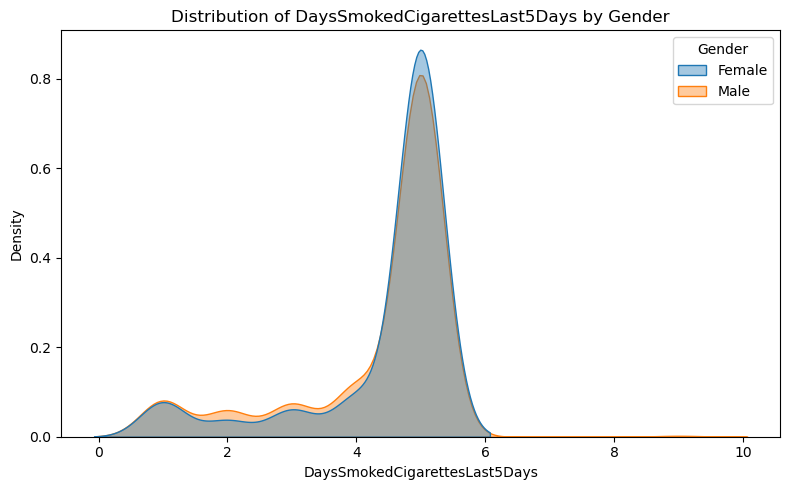

In [36]:

CAT_VAR = "Gender"
NUM_VAR = "DaysSmokedCigarettesLast5Days"

sub = df[[CAT_VAR, NUM_VAR]].copy()

missingness = sub.isna().mean().to_frame("MissingRate")
print("Missingness rates:")
display(missingness)

desc_by_group = sub.groupby(CAT_VAR)[NUM_VAR].describe()
print("\nDescriptive stats of", NUM_VAR, "by", CAT_VAR)
display(desc_by_group)

plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=sub,
    x=NUM_VAR,
    hue=CAT_VAR,
    common_norm=False,
    fill=True,
    alpha=0.4
)
plt.title(f"Distribution of {NUM_VAR} by {CAT_VAR}")
plt.xlabel(NUM_VAR)
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Interestingly, women who self reported had higher days smoked cigarettes than men who self reported, but this shows that anyone who smokes at all is likely to do so as a daily habit.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

We define the kernel weights at $z$ as  

$$
w_i(z) \;=\; \frac{1}{h}\,k\!\left(\frac{z-x_i}{h}\right) \;\;\; (\geq 0).
$$

The objective is the kernel–weighted mean squared error:

$$
MSE(\hat{y}(z)) \;=\; \frac{1}{N} \sum_{i=1}^N \big(y_i - \hat{y}(z)\big)^2 \, w_i(z).
$$

Treating $z$ (and therefore $w_i(z)$) as fixed, we minimize with respect to $\hat{y}(z)$.

Differentiate:

$$
\frac{\partial}{\partial \hat{y}(z)} MSE(\hat{y}(z))
\;=\; \frac{1}{N} \sum_{i=1}^N 2\big(\hat{y}(z) - y_i\big)\,w_i(z).
$$

Setting the derivative equal to zero (first–order condition):

$$
\sum_{i=1}^N \big(\hat{y}(z) - y_i\big)\,w_i(z) \;=\; 0,
$$

which implies

$$
\hat{y}(z)\,\sum_{i=1}^N w_i(z) \;=\; \sum_{i=1}^N w_i(z)\,y_i.
$$

Assuming $\sum_i w_i(z) > 0$, the solution is

$$
\hat{y}(z) \;=\; \frac{\sum_{i=1}^N w_i(z)\,y_i}{\sum_{i=1}^N w_i(z)}
\;=\; \frac{\sum_{i=1}^N \tfrac{1}{h} k\!\left(\tfrac{z-x_i}{h}\right) y_i}
{\sum_{i=1}^N \tfrac{1}{h} k\!\left(\tfrac{z-x_i}{h}\right)}.
$$

This expression is exactly the *local constant least squares* minimizer, also known as the **Nadaraya–Watson estimator**:

$$
\hat{m}(z) \;=\; \frac{\sum_{i=1}^N K_h(z-x_i)\,y_i}{\sum_{i=1}^N K_h(z-x_i)}, 
\quad \text{where } K_h(u) = \frac{1}{h}k\!\left(\frac{u}{h}\right).
$$


4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.


Silverman bandwidth used: 2.189


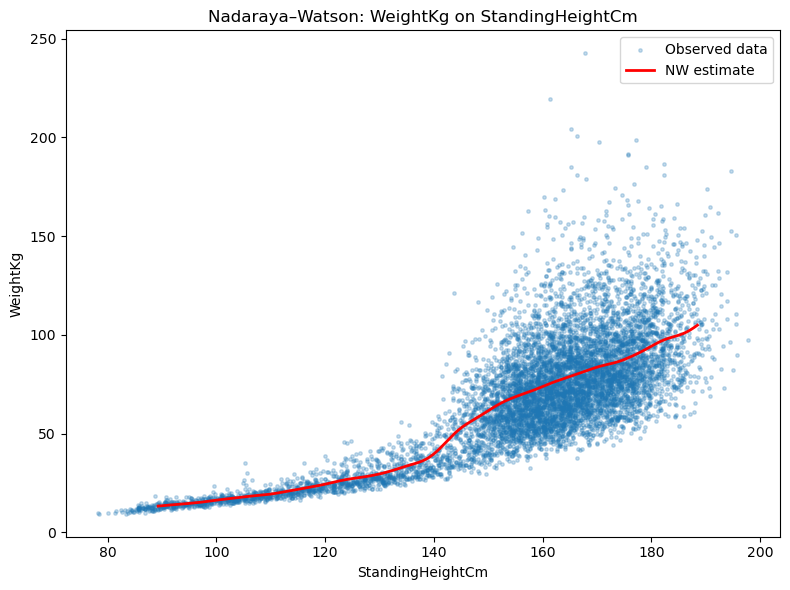

In [37]:

def gaussian_kernel(u: np.ndarray) -> np.ndarray:
    return np.exp(-0.5 * u * u) / np.sqrt(2 * np.pi)

def silverman_bandwidth(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    n = len(x)
    if n < 2:
        return np.nan
    sd = np.std(x, ddof=1)
    q75, q25 = np.percentile(x, [75, 25])
    iqr = q75 - q25
    sigma = min(sd, iqr / 1.349) if iqr > 0 else sd
    return 0.9 * sigma * n ** (-1/5) if sigma > 0 else 1.0

def nadaraya_watson(x_train, y_train, x_eval, bandwidth=None):
    x_train = np.asarray(x_train, dtype=float)
    y_train = np.asarray(y_train, dtype=float)
    mask = np.isfinite(x_train) & np.isfinite(y_train)
    x_train, y_train = x_train[mask], y_train[mask]

    if bandwidth is None or not np.isfinite(bandwidth) or bandwidth <= 0:
        bandwidth = silverman_bandwidth(x_train)

    xe = np.asarray(x_eval, dtype=float)
    out = np.empty_like(xe, dtype=float)
    for j, xv in enumerate(xe):
        w = gaussian_kernel((xv - x_train) / bandwidth)
        s = np.sum(w)
        out[j] = np.nan if s == 0 else np.sum(w * y_train) / s
    return out, float(bandwidth)

X_VAR = "StandingHeightCm"
Y_VAR = "WeightKg"

x = df[X_VAR].to_numpy(dtype=float)
y = df[Y_VAR].to_numpy(dtype=float)

grid = np.linspace(np.nanpercentile(x, 1), np.nanpercentile(x, 99), 150)
mhat, h_used = nadaraya_watson(x, y, grid)

print(f"Silverman bandwidth used: {h_used:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=6, alpha=0.25, label="Observed data")
plt.plot(grid, mhat, color="red", linewidth=2, label="NW estimate")
plt.title(f"Nadaraya–Watson: {Y_VAR} on {X_VAR}")
plt.xlabel(X_VAR)
plt.ylabel(Y_VAR)
plt.legend()
plt.tight_layout()
plt.show()

The Nadaraya–Watson estimator gives a smooth picture of how weight changes with height in the NHANES data. The fitted curve rises as expected, showing that taller people generally weigh more, though there is a lot of variation around the line. Using Silverman’s bandwidth produces a reasonable balance, capturing the overall upward trend without chasing every local fluctuation. While the relationship is clear, it is not strictly causal since weight also depends on factors like age, sex, diet, and activity level. Still, the estimator is useful for summarizing and predicting average weight given height.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome